In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/listings.csv', encoding='utf-8')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.41810,Entire home/apt,105.0,63,148,2023-05-25,0.81,1,272,0,First name and Last name: Nicolas Krotz <br/> ...
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Pankow,Prenzlauer Berg Südwest,52.53269,13.41805,Entire home/apt,180.0,6,7,2020-01-04,0.06,1,32,0,03/Z/RA/003410-18
2,14325,Studio Apartment in Prenzlauer Berg,55531,Chris + Oliver,Pankow,Prenzlauer Berg Nordwest,52.54813,13.40366,Entire home/apt,70.0,150,26,2023-11-30,0.15,4,185,1,NaN
3,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Friedrichshain-Kreuzberg,nördliche Luisenstadt,52.50312,13.43508,Entire home/apt,90.0,93,48,2017-12-14,0.28,2,0,0,NaN
4,17904,Beautiful Kreuzberg studio - 3 months minimum,68997,Matthias,Neukölln,Reuterstraße,52.49419,13.42166,Entire home/apt,25.0,92,299,2022-12-01,1.71,1,1,0,NaN


In [3]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.375900e+04,1.375900e+04,13759.000000,13759.000000,8821.000000,13759.000000,13759.000000,10521.000000,13759.000000,13759.000000,13759.000000
mean,3.529798e+17,1.618469e+08,52.509342,13.402723,154.840381,40.905952,38.364779,1.210078,11.022531,125.307799,8.933353
std,4.588343e+17,1.822188e+08,0.033789,0.067338,296.293035,52.400853,86.967422,1.836353,40.753865,129.410364,19.460106
min,3.176000e+03,1.581000e+03,52.340190,13.118150,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.884756e+07,1.447609e+07,52.490077,13.362765,74.000000,2.000000,1.000000,0.130000,1.000000,0.000000,0.000000
50%,4.234426e+07,6.789678e+07,52.509220,13.411275,114.000000,5.000000,7.000000,0.550000,1.000000,82.000000,1.000000
75%,8.461250e+17,2.785392e+08,52.532147,13.438580,186.000000,92.000000,33.000000,1.700000,4.000000,252.000000,9.000000
max,1.184030e+18,5.846847e+08,52.656110,13.721390,24277.000000,1000.000000,2611.000000,51.320000,281.000000,365.000000,512.000000


# 1.3 Очистка данных

In [4]:
# Основные операции по очистке данных:

# Удаление переменных
# one-hot кодирование
# Удаление пропущенных значений
# Уменьшение размерности

In [5]:
del df['latitude']
del df['longitude']

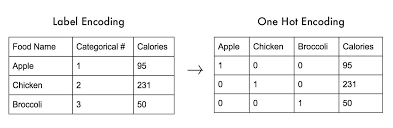

In [6]:
df = pd.get_dummies(df,columns=['neighbourhood_group','neighbourhood'])

df.head()

,id,name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,neighbourhood_West 3,neighbourhood_West 4,neighbourhood_West 5,neighbourhood_Westend,neighbourhood_Wiesbadener Straße,neighbourhood_Wilhelmstadt,neighbourhood_Zehlendorf Nord,neighbourhood_Zehlendorf Südwest,neighbourhood_nördliche Luisenstadt,neighbourhood_südliche Luisenstadt
0,3176,Fabulous Flat in great Location,3718,Britta,Entire home/apt,105.0,63,148,2023-05-25,0.81,...,False,False,False,False,False,False,False,False,False,False
1,9991,Geourgeous flat - outstanding views,33852,Philipp,Entire home/apt,180.0,6,7,2020-01-04,0.06,...,False,False,False,False,False,False,False,False,False,False
2,14325,Studio Apartment in Prenzlauer Berg,55531,Chris + Oliver,Entire home/apt,70.0,150,26,2023-11-30,0.15,...,False,False,False,False,False,False,False,False,False,False
3,16644,In the Heart of Berlin - Kreuzberg,64696,Rene,Entire home/apt,90.0,93,48,2017-12-14,0.28,...,False,False,False,False,False,False,False,False,True,False
4,17904,Beautiful Kreuzberg studio - 3 months minimum,68997,Matthias,Entire home/apt,25.0,92,299,2022-12-01,1.71,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Удаление столбцов с информацией, вытекающий из других столбцов методом исключения
# Например, в случае с Марико интерпретатор Python может сделать вывод о том, что объект из Токио, 
# на основании ложных аргументов city_london и city_mumbai. 
# В статистике это понятие известно как мультиколлинеарность 
# и описывает возможность предсказать переменную на основе значений других переменных.

# Мы можем добавить параметр drop_first=True, который удаляет первый столбец для каждой переменной.

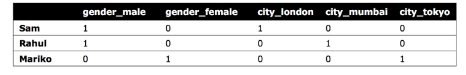 --> 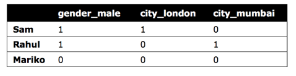

In [8]:
# df = pd.get_dummies(df, columns = ['neighbourhood_group', 'neighbourhood'], drop_first = True)

# 1.4 Работа с пропусками

In [9]:
df.isnull().sum()

id                                     0
name                                   0
host_id                                0
host_name                              9
room_type                              0
                                      ..
neighbourhood_Wilhelmstadt             0
neighbourhood_Zehlendorf  Nord         0
neighbourhood_Zehlendorf  Südwest      0
neighbourhood_nördliche Luisenstadt    0
neighbourhood_südliche Luisenstadt     0
Length: 164, dtype: int64

In [10]:
# df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

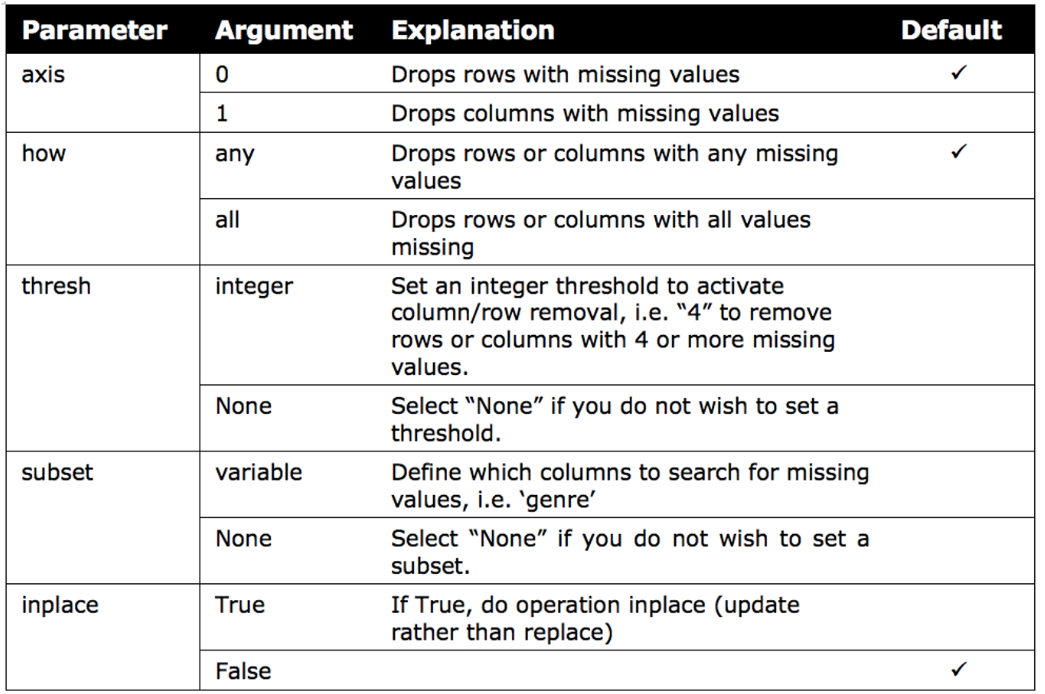

# 1.5 Уменьшение размерности

In [11]:
# Уменьшение размерности преобразует данные в более низкую размерность. 
# Это позволяет сократить вычислительные ресурсы и визуализировать закономерности в данных.
# Размерность - это количество переменных, описывающих данные.

# 2.1 Разбиение данных

In [12]:
# Обучающий и тестовый набор
# Для выполнения раздельной валидации в Python можно использовать train_test_split от Scikit-learn, 
# который требует первоначального импорта из библиотеки sklearn.model_selection.

from sklearn.model_selection import train_test_split

In [13]:
# Перед использованием этой библиотеки сначала нужно задать значения x и y.

df = pd.read_csv('data/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [14]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'Country']]
y = df['Clicked on Ad']

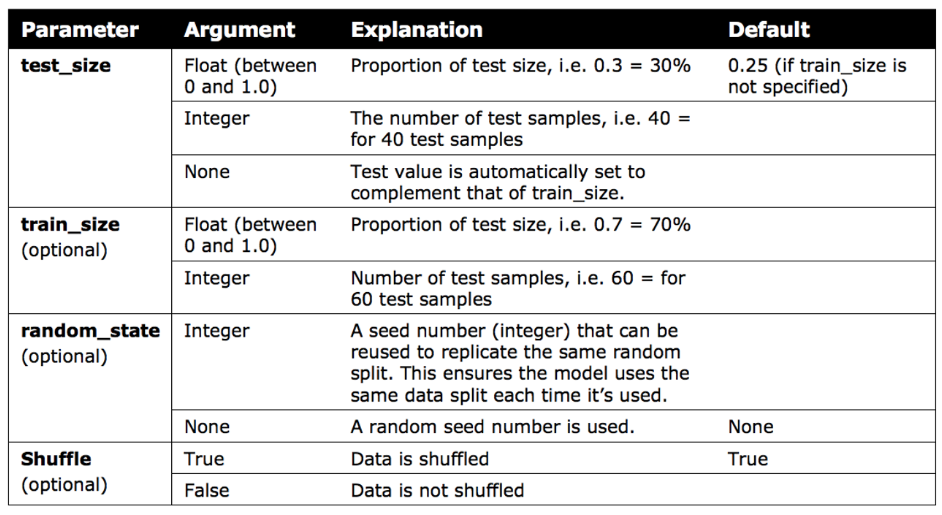

In [15]:
# В этом примере данные для обучения/тестирования разделены 70/30 и перемешаны, 
# а случайное состояние 10 «заложено в закладки» для будущего повторения кода 
# (чтобы «рандомное» разделение  в следующий раз  привело к тем же результатам).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

In [16]:
# Валидационный набор
# Одним из быстрых решений является разбиение тестовых данных на две части, как показано ниже.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Таким образом, тренировочные данные составляют 60 %, а тестовые - 40 %. 
# Затем тестовые данные делятся 50/50, чтобы тестовые данные и набор для проверки были эквивалентны 20 % исходных данных.

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

# 2.2 Создание модели

In [17]:
# План разработки модели  включает в себя следующие шаги:

# Импорт библиотек
# Импорт набора данных
# Разведывательный анализ данных
# Очистка и обработка данных
# Разбиение данных
# Алгоритм предварительного моделирования (опционально)
# Обучение алгоритма (получение модели)
# Прогнозирование
# Оценка качества предсказания
# Оптимизация

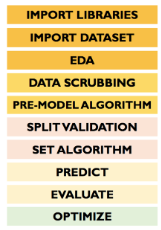

In [18]:
# 1) Импорт библиотек

# Учитывая, что интерпретатор Python работает сверху вниз по вашему коду, очень важно импортировать библиотеки перед вызовом определенных функций. 
# Например, если вы попытаетесь создать тепловую карту, не импортировав предварительно Seaborn и Matplolib, интерпретатор Python не сможет обработать ваш запрос.

# Библиотеки не обязательно должны быть размещены в верхней части кода.
# Некоторые специалисты по исследованию данных, например, предпочитают импортировать конкретные библиотеки, основанные на алгоритмах, в те разделы, 
# где они используются, при условии, что импорт производится перед ссылками кода на эту библиотеку.

In [19]:
# 2) Импорт набора данных

# Наборы данных обычно импортируются из архивов вашей организации или публичных хранилищ, таких как Kaggle. 
# Хотя Kaggle предлагает фантастическое количество наборов данных, стоит упомянуть, 
# что Scikit-learn предлагает несколько небольших встроенных наборов данных, которые не требуют загрузки извне.

Краткая информация о наборах данных Scikit-learn <br> <br>
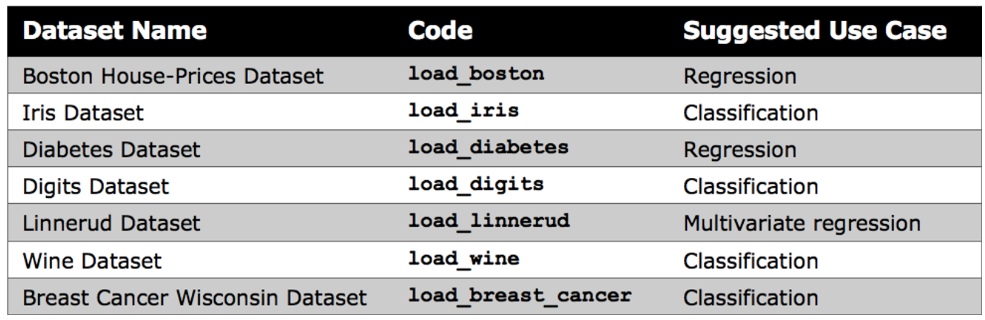

In [20]:
# Создание блобов
# Используя Scikit-learn, можно самостоятельно сгенерировать случайный набор данных с помощью функции make blobs.

# from sklearn.datasets import make_blobs
# data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [21]:
# 3) Исследовательский анализ данных

# Третий этап, EDA, дает возможность ознакомиться с вашими данными, включая распределение и состояние пропущенных значений. 
# Исследовательский анализ данных также определяет следующий этап очистки данных и выбор алгоритма.

# Кроме того, EDA может использоваться и в других разделах кода, когда вы проверяете размер и структуру набора данных 
# и интегрируете эту обратную связь в прямую оптимизацию модели.

In [22]:
# 4) Очистка данных

# Этап очистки данных обычно отнимает больше всего времени и сил при разработке модели прогнозирования. 
# Как и при уходе за хорошей парой туфель, важно уделять внимание качеству данных.

In [23]:
# 5) Алгоритм предварительного моделирования (опционально)

# В качестве дополнения к процессу очистки данных при подготовке к анализу больших и сложных наборов данных иногда используются методы 
# неконтролируемого обучения, включая кластерный анализ и алгоритмы уменьшения размерности.

# Однако этот шаг необязателен и применяется не для всех моделей, 
# особенно редко для небольших наборов данных с малым количеством измерений (признаков) или строк.

In [24]:
# 6) Разделение данных

# Разделение данных используется для разделения данных на обучающие и тестовые. 
# На этом этапе также полезно рандомизировать данные с помощью функции shuffle и задать случайное состояние, 
# если вы хотите воспроизвести результаты модели в будущем.

In [25]:
# 7) Обучение алгоритма

# Алгоритмы - это центральный элемент любой модели машинного обучения, и выбирать их нужно тщательно.

# Алгоритм - это математически обоснованная последовательность шагов, которая реагирует на изменяющиеся закономерности, 
# чтобы сгенерировать решение или выход. Выполняя ряд шагов, определенных алгоритмом, модель реагирует на входные переменные, 
# чтобы интерпретировать закономерности, производить расчеты и принимать решения.

# Поскольку входные данные являются переменными, алгоритмы могут выдавать различные результаты в зависимости от входных данных. 
# Алгоритмы также могут быть изменчивыми, поскольку они имеют гиперпараметры, 
# которые можно корректировать для создания более адаптированной модели.

# Таким образом, алгоритмы представляют собой скорее подвижную структуру, чем конкретное уравнение, 
# и настраиваются в зависимости от целевого результата и характеристик входных данных.

# Для контекста не следует путать алгоритм с моделью. Модель - это конечное состояние алгоритма; 
# после консолидации гиперпараметров в ответ на шаблоны, полученные из данных, 
# и после завершения комбинации методов очистки данных, проверки на разделение и оценки. 
# Ниже приведен список популярных алгоритмов, используемых в машинном обучении, и их общие характеристики.

Краткая информация о наборах данных Scikit-learn <br> <br>
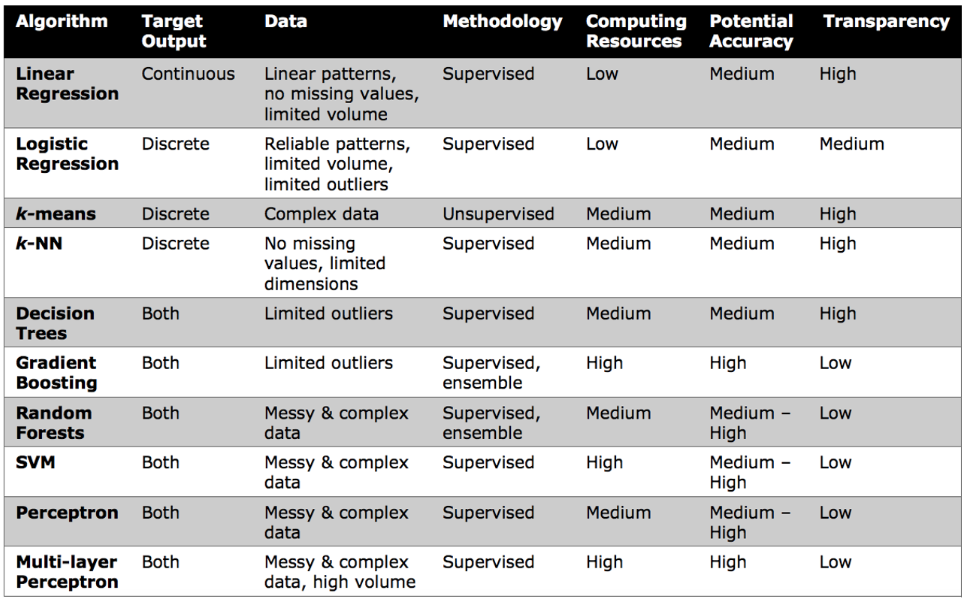

In [26]:
# 8) Предсказание

# После создания первоначальной модели с использованием паттернов, извлеченных из обучающих данных, 
# функция predict вызывается на тестовых данных для проверки модели.

# Функция predict генерирует числовое значение, например цену, или числовой показатель корреляции в задачах регрессии. 
# При классификации функция predict генерирует дискретные классы, такие как категория фильмов или классификация спам/не спам.

In [27]:
# 9) Оценка качества предсказания

# Следующий шаг в процессе разработки модели - оценка результатов. 
# Метод оценки зависит от сферы применения вашей модели. 
# В частности, это зависит от того, будет ли это классификационная или регрессионная модель. 
# При классификации распространенными методами оценки являются матрица путаницы, отчет о классификации и оценка точности.

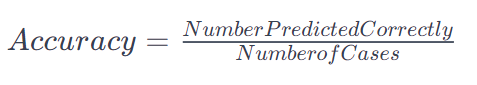

In [28]:
# Accuracy

# Это простая метрика, измеряющая, сколько случаев модель классифицировала правильно, 
# деленная на полное количество случаев. Если все предсказания верны, показатель accuracy равен 1.0, 
# а если все случаи предсказаны неверно - 0.

# Хотя accuracy сама по себе обычно является надежной метрикой производительности, 
# она может скрывать чрезмерное количество ложных или отрицательных результатов. 
# Это не проблема, если количество ложноположительных и ложноотрицательных результатов сбалансировано, 
# но это также не то, что можно определить с помощью одной лишь точности. 
# Поэтому мы обратились к двум следующим методам оценки.

In [29]:
# Матрица путаницы

# Матрица запутанности (также известная как матрица ошибок) - это простая таблица, 
# которая обобщает результаты работы модели, включая точное количество ложноположительных и ложноотрицательных результатов.

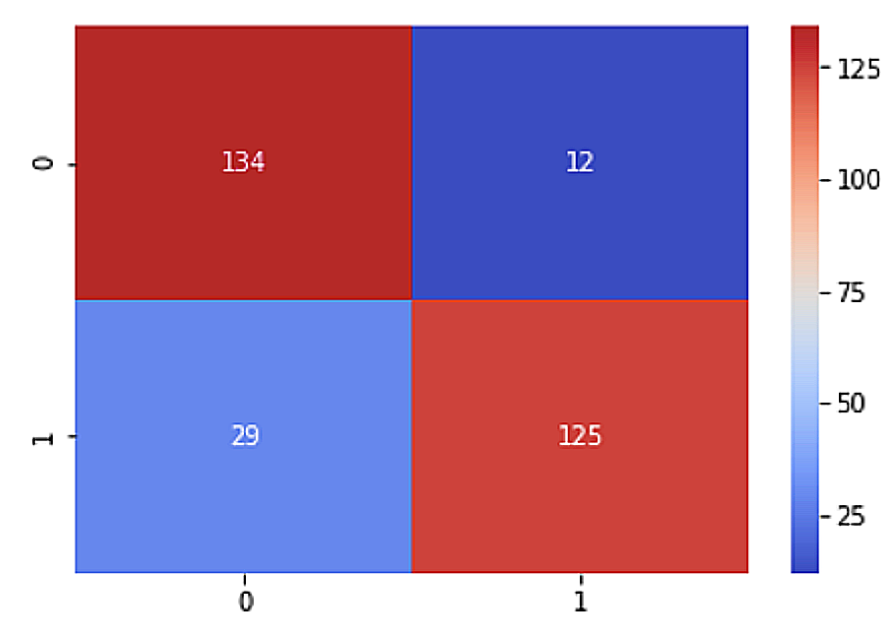

In [30]:
# Как видно в левом верхнем поле, модель в этом примере правильно предсказала 134 точки данных как «0» и 125 как «1».
#  Модель также неправильно предсказала 12 точек данных как «1» и 29 случаев как «0». 
# Это означает, что 12 точек данных, которые были предсказаны как «1» (ложноположительные), 
# должны были быть классифицированы как «0», а 29 точек данных, предсказанных как «0» (ложноотрицательные), 
# должны были быть классифицированы как «1».

# Используя матрицу путаницы, вы можете проанализировать соотношение ложноположительных и ложноотрицательных результатов 
# и рассчитать итоговую точность предсказаний, разделив общее количество ложноположительных (12) и ложноотрицательных (29) результатов 
# на общее количество точек данных, которое в данном случае равно 300.

In [31]:
# Отчет о классификации

# Еще один популярный метод оценки - отчет о классификации, который генерирует три метрики оценки.

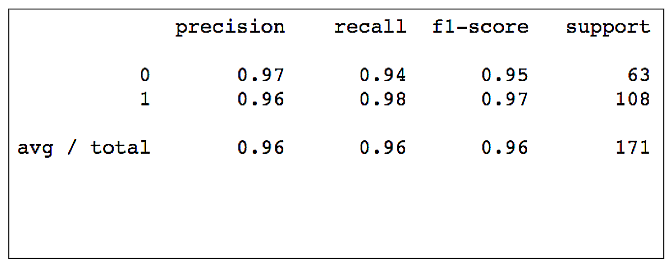

In [32]:
# Precision

# Precision - это отношение правильно предсказанных истинно положительных случаев к общему числу предсказанных положительных случаев. 
# Высокий показатель точности означает низкое количество ложных срабатываний.

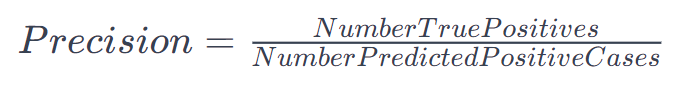

In [33]:
# Эта метрика отвечает на вопрос о том, насколько точно модель предсказывает положительный результат. 
# Другими словами, это способность модели не выдать отрицательный случай за положительный, что важно, 
# например, в случае с тестами на наркотики.

In [34]:
# Recall

# Показатель recall модели аналогичен показателю precision, 
# но в данном случае представляет собой отношение правильно предсказанных истинных положительных результатов 
# к реальным положительным случаям. Другими словами, отзыв отвечает на вопрос о том, 
# сколько положительных результатов было правильно классифицировано как положительные. 
# Это можно понимать как способность модели идентифицировать все положительные случаи. 
# Обратите внимание, что числитель (вверху) одинаков для precision и recall, а знаменатели (внизу) различны.

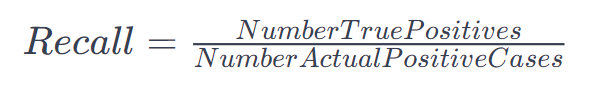

In [35]:
# F1-score
# F1-score - это средневзвешенное значение precision и recall. 
# Обычно он используется в качестве метрики для сравнения моделей между собой, а не для оценки точности отдельной модели.

# Кроме того, показатель f1-score обычно ниже, чем показатель точности, из-за способа расчета recall и precision.

In [36]:
# Двумя наиболее распространенными оценочными показателями задач регрессии (прогнозирование непрерывных переменных) 
# являются MAE и RMSE.

In [37]:
# MAE (mean absolute error) измеряет средние ошибки в наборе прогнозов, 
# то есть насколько далеко линия регрессии находится от реальных точек данных. 

# RMSE (root mean square error), с другой стороны, измеряет стандартное отклонение ошибок прогнозирования, 
# которое показывает, насколько сконцентрированы или разбросаны ошибки прогнозирования от оптимального соответствия.

# Учитывая, что перед усреднением ошибки возводятся в квадрат, RMSE гораздо более чувствителен к большим ошибкам, чем MAE. 
# С другой стороны, RMSE не так легко интерпретировать, как MAE, поскольку он не описывает среднюю ошибку предсказаний модели. 
# Поэтому RMSE чаще используется в качестве механизма обратной связи для штрафования плохих предсказаний, 
# чем для исследования средней ошибки для каждого предсказания.

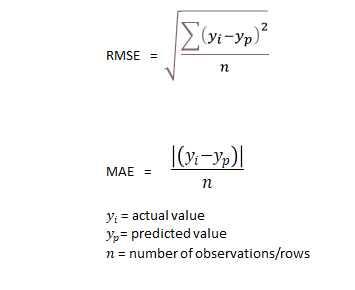

In [38]:
# 10) Оптимизация

# Последний шаг - оптимизация модели. 
# Оптимизация модели может быть выполнена вручную с помощью системы проб и ошибок 
# или с помощью автоматизации с использованием поиска по сетке (или кросс-валидации).

# Этот метод позволяет опробовать ряд конфигураций для каждого гиперпараметра 
# и методично протестировать каждый из возможных гиперпараметров. 
# Затем происходит автоматизированный процесс голосования для определения оптимальной модели.

# Поскольку модель должна исследовать каждую возможную комбинацию гиперпараметров, 
# поиск по сетке может занять много времени (в соответствии с количеством комбинаций, 
# которые вы задаете для каждого гиперпараметра).

# 2.3 Простая линейная регрессия

In [39]:
# Линейная регрессия — это одна из простейших моделей машинного обучения, 
# используемая для предсказания значения целевой переменной на основе одной
# или нескольких независимых переменных (признаков).

In [40]:
# цена дома = A∗площадь + B∗количество комнат +...+ Y∗удаленность от метро + Z

# где Z (a0) - свободный член (интерсепт), который представляет собой значение целевой переменной при нулевых значениях всех признаков.

In [41]:
# Графически линейная регрессия для одномерного случая выглядит как прямая линия, которая "лучшим образом" проходит через точки данных. 
# Мы пытаемся найти такие коэффициенты β0​ и β1, 
# которые минимизируют расхождения между предсказанными значениями y^ и реальными значениями y.

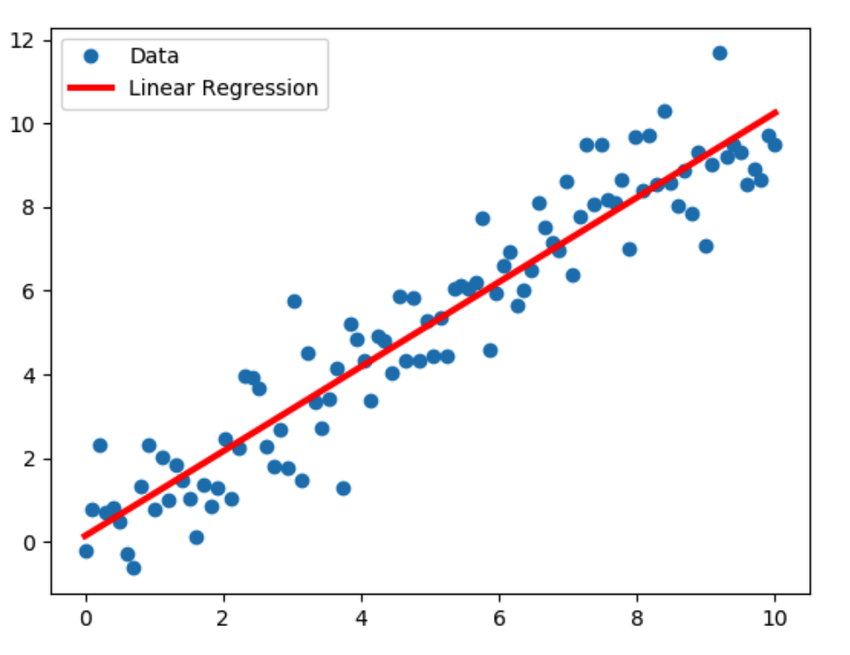

## Оценка точности модели

In [42]:
# Среднеквадратичная ошибка (MSE):
# MSE измеряет среднее значение квадратов отклонений предсказанных значений от реальных.

# Основной недостаток (но и преимущество) MSE заключается в том, 
# что она сильно штрафует большие ошибки (за счет возведения разницы в квадрат), 
# что может привести к ситуациям, когда модель чересчур сильно пытается уменьшить влияние выбросов 
# (нетипичных данных, сильно удаленных от средних значений).

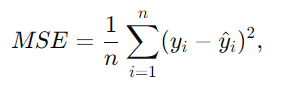

In [43]:
# Средняя абсолютная ошибка (MAE):

# MAE измеряет среднюю величину ошибок в предсказаниях, но без возведения их в квадрат: 
# В отличие от MSE, MAE дает равномерное "штрафование" за ошибки любого масштаба и менее чувствительна к выбросам.

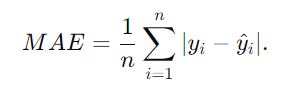

In [44]:
# Средний абсолютный процент ошибки (MAPE):

# MAPE измеряет средний процент отклонения предсказанных значений от реальных:
# MAPE особенно полезна для данных, где важна относительная ошибка, а не абсолютная величина ошибки.

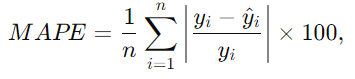

In [45]:
# Корень из среднеквадратичной ошибки (RMSE):

# RMSE — это корень из MSE, который помогает вернуть ошибку в тех же единицах измерения, что и исходные данные. 
# RMSE полезна в тех случаях, когда требуется более интерпретируемая оценка, 
# чем просто MSE, поскольку её масштаб совпадает с масштабом целевой переменной.

In [46]:
# R^2 - Коэффициент детерминации

# Еще одной важной метрикой для оценки качества линейной регрессии является коэффициент детерминации R^2, 
# который показывает, какую долю изменчивости целевой переменной объясняет модель.
# Значение ближе к 1 указывает на лучшее качество модели — чем выше R^2, тем лучше модель объясняет данные.

## Оптимизация модели через минимизацию функции потерь

In [47]:
# Минимизация функции потерь является задачей оптимизации.

# Основной механизм, позволяющий оценить, насколько хорошо модель справляется с задачей, — это функция потерь, 
# которая измеряет расхождение между предсказанными и реальными значениями. 

# Наша конечная цель — найти такие параметры модели, которые минимизируют эту функцию потерь, 
# что позволит сделать наилучшие предсказания.

In [48]:
# Начальные параметры любой модели, как правило, далеки от оптимальных. 
# Для того чтобы улучшить качество предсказаний, мы должны скорректировать эти параметры таким образом, 
# чтобы минимизировать ошибку.

In [49]:
# Задача минимизации функции потерь может быть сформулирована как задача нахождения таких параметров модели θ, 
# при которых значение функции потерь L(θ) достигает своего минимума.

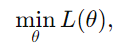

In [50]:
# где θ  — это вектор параметров модели, 
# а L(θ) — это функция потерь, зависящая от этих параметров. 

# Вектор параметров может содержать коэффициенты регрессии, веса нейронной сети или другие переменные, 
# которые определяют поведение модели.

In [51]:
# Численные методы оптимизации

# Поскольку аналитические решения практически недостижимы для сложных моделей, 
# задача сводится к поиску минимального значения функции потерь с использованием численных методов. 

# Такие методы предполагают итеративное обновление параметров модели с целью уменьшения значения функции потерь на каждом шаге.

# Основная идея численной оптимизации заключается в том, чтобы на каждом шаге менять параметры модели в направлении, 
# которое приводит к уменьшению значения функции потерь. 

# Этот процесс продолжается до тех пор, пока не будет достигнуто определённое условие остановки, 
# например, когда дальнейшие изменения параметров больше не приводят к существенному снижению ошибки.

## Градиент как направление наибольшего изменения

In [52]:
# Одним из наиболее эффективных и популярных методов численной оптимизации в машинном обучении 
# (поиска локального минимума функции потерь, то есть тех весов модели, которые приводят к наименьшей ошибке) 
# является градиентный спуск. 

# Этот метод основан на вычислении градиента функции потерь. 

# Градиент — это вектор, который указывает направление наибольшего роста функции. 
# В случае минимизации, мы движемся в направлении, противоположном градиенту, чтобы уменьшить значение функции потерь.

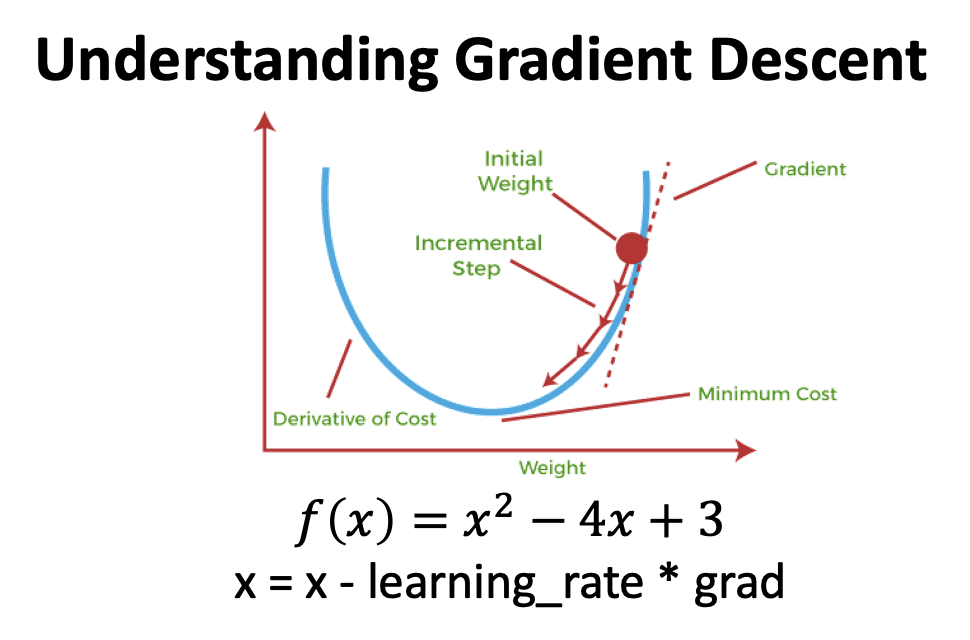

In [53]:
# Параметры модели обновляются по следующему правилу:
# θ := θ − α * ∇L(θ)

# где:
# α — это скорость обучения (learning rate), которая определяет, насколько большие шаги делаются при каждом обновлении параметров,
# ∇L(θ) — это градиент функции потерь по параметрам θ, 
# показывающий направление наибольшего увеличения значения функции потерь.

In [54]:
# Процесс градиентного спуска:

# 1) Инициализация параметров: 
# Начинаем с какого-то начального набора параметров θ, 
# которые могут быть заданы случайно или на основе априорных знаний.

# 2) Вычисление градиента: 
# На каждом шаге вычисляется градиент функции потерь по каждому параметру модели. 
# Градиент показывает, насколько сильно изменение каждого параметра повлияет на изменение значения функции потерь.

# 3) Обновление параметров: 
# Параметры корректируются в направлении, противоположном градиенту, 
# чтобы уменьшить значение функции потерь.

# 4) Повторение итераций: 
# Этот процесс повторяется до тех пор, пока не будет достигнут минимум функции потерь или до тех пор, 
# пока изменения в параметрах становятся незначительными.

In [55]:
# Скорость обучения и её влияние

# Одним из ключевых параметров градиентного спуска является скорость обучения (α). 
# Скорость обучения определяет, насколько большими будут шаги обновления параметров на каждом этапе. 

# Если скорость обучения слишком мала, процесс минимизации будет очень медленным. 
# Если же скорость обучения слишком велика, модель может перепрыгнуть через минимум функции потерь и не достичь оптимальных значений параметров.

# Выбор правильного значения скорости обучения — это важная часть настройки градиентного спуска. 
# В некоторых случаях применяются методы адаптивной регулировки скорости обучения, которые уменьшают её значение по мере приближения к минимуму.

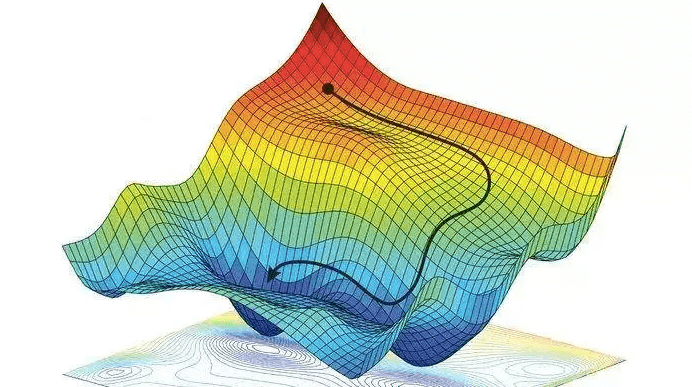

In [56]:
# Проблемы и улучшения градиентного спуска

# Хотя градиентный спуск — это мощный и эффективный метод оптимизации, у него есть свои ограничения. 

# Например, при наличии нескольких локальных минимумов функция потерь может "застрять" в одном из них и не достичь глобального минимума. 

# Для преодоления этой проблемы были разработаны различные модификации градиентного спуска, такие как 
# стохастический градиентный спуск (SGD), который работает с случайными подвыборками данных, 
# или методы с импульсом (momentum), которые учитывают предыдущие направления изменения параметров, что помогает избежать локальных минимумов.

# 2.4 Имплементация (реализация) линейной регрессии

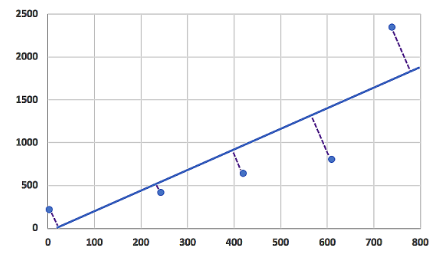

In [57]:
# При подготовке к построению линейной регрессионной модели сначала необходимо удалить 
# или заполнить недостающие значения и убедиться, что независимые переменные наиболее коррелируют с зависимой переменной. 
# При этом независимые переменные не должны коррелировать друг с другом.

# Если между двумя или более независимыми переменными существует сильная линейная корреляция, 
# мы сталкиваемся с проблемой, называемой коллинеарностью (в случае двух переменных) 
# или мультиколлинеарностью (в случае более двух коррелирующих переменных), когда отдельные переменные не являются де-факто уникальными.

# Хотя это не влияет на общую точность модели, это сказывается на расчетах и интерпретации отдельных (независимых) переменных. 
# Однако вы все равно можете надежно предсказать результат (зависимую переменную), используя коллинеарные переменные. 
# Просто становится трудно сказать, какие переменные влияют, а какие являются лишними при определении результатов модели.

# Построение модели на реальных данных

In [58]:
# Импорт библиотек
# Импорт набора данных
# Разведывательный анализ данных
# Очистка и обработка данных
# Разбиение данных
# Алгоритм предварительного моделирования (опционально)
# Обучение алгоритма (получение модели)
# Прогнозирование
# Оценка качества предсказания
# Оптимизация

## 1) Импорт библиотек

In [59]:
#1. Import libraries

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## 2) Импорт набора данных

In [60]:
#2. Import dataset
df = pd.read_csv('data/Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

## 3) Удаление переменных

In [62]:
# Регрессионные модели могут быть разработаны двумя способами. 

# Первый - следовать принципу парсимонии, при котором используется ограниченное или небольшое число переменных, 
# объясняющих большую часть дисперсии. 

# Другой способ - захват максимальной дисперсии, при котором используется больше переменных, 
# включая переменные, объясняющие малую долю дисперсии.

# У обоих методов есть свои плюсы и минусы, а также другие соображения, такие как вычислительные ресурсы и сложность модели.

# Для нашей модели мы сосредоточимся на использовании ограниченного числа переменных из соображений удобства. 
# Однако мы также построим нашу модель, используя переменные, уже выраженные численно, 
# включая Price, Distance, BuildingArea, Bedroom2, Bathroom, Rooms, Car, Propertycount, и Landsize. 
# Это означает, что вы можете игнорировать и удалить нечисловые переменные, такие как Address, Method, SellerG, Date и т. д., 
# которые в противном случае пришлось бы преобразовывать в числовой формат, чтобы алгоритм мог их считать.

In [63]:
#3. Remove variables
del df['Address']
del df['Method']
del df['SellerG']
del df['Date']
del df['Postcode']
del df['YearBuilt']
del df['Type']
del df['Lattitude']
del df['Longtitude']
del df['Regionname']
del df['Suburb']
del df ['CouncilArea']

In [64]:
display(df.head())
print(df.isna().sum())

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount
0,2,NaN,2.5,2.0,1.0,1.0,126.0,NaN,4019.0
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,4019.0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,4019.0
3,3,NaN,2.5,3.0,2.0,1.0,0.0,NaN,4019.0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,4019.0


Rooms                0
Price             7610
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Propertycount        3
dtype: int64


In [65]:
# Закончим наш исследовательский анализ и воспользуемся тепловой картой 
# для анализа корреляции (corr) между всеми комбинациями переменных.

df_heat = df.corr()
sns.heatmap(df_heat, annot=True, cmap='coolwarm');

In [66]:
# Проверим форму набора данных

print(df.shape)

(34857, 9)


In [67]:
# Другие переменные для удаления Bedroom2 сильно коррелируют с Rooms (0,95). 
# Как упоминалось ранее, мы хотим избежать добавления независимых переменных, 
# которые сильно коррелируют друг с другом. 
# Это означает, что нам придется удалить одну из этих двух переменных.

In [68]:
# Переменная Bedroom2 (вторая спальня) может оказаться полезной, 
# поскольку она имеет более узкое определение, чем Rooms. 

# Это явное знание, например, может быть полезно для принятия решений о ремонте 
# и добавлении дополнительной спальни в недвижимость. 

# Однако, поскольку для переменной Rooms нет пропущенных значений, 
# а для Bedroom2 пропущено 8 226 значений, вы включите первую в нашу модель и удалите вторую.

# Landsize (0,033) и Propertycount (0,059) также можно удалить, 
# поскольку эти переменные показывают низкую корреляцию с зависимой переменной Price, 
# что опять же нежелательно для нашей модели линейной регрессии.

#Remove variables
del df ['Bedroom2']
del df ['Landsize']
del df ['Propertycount']

## 4) Очистка и обработка данных

In [69]:
# Линейная регрессия не работает гладко с недостающими значениями. 
# Поэтому нам необходимо оценить или удалить эти значения из массива данных.

In [70]:
# Переменная BuildingArea имеет 21 115 пропущенных строк, что составляет две трети фрейма данных! 
# Чтобы сохранить глубину рядов, можно полностью удалить эту переменную, 
# тем более что она не сильно коррелирует с зависимой переменной Price (0,1).

In [71]:
# Остальные переменные можно удалять по строкам или заполнять средним значением. 

# Основываясь на анализе исследовательских данных, вы можете:

# Использовать среднее значение для заполнения переменных с частичной корреляцией с ценой (например, Car).
# Удалить строки для переменных с небольшим количеством пропущенных значений (например, Расстояние).
# Не заполнять значения переменных со значительной корреляцией с ценой и вместо этого удалять недостающие значения по строкам (например, Bathroom).

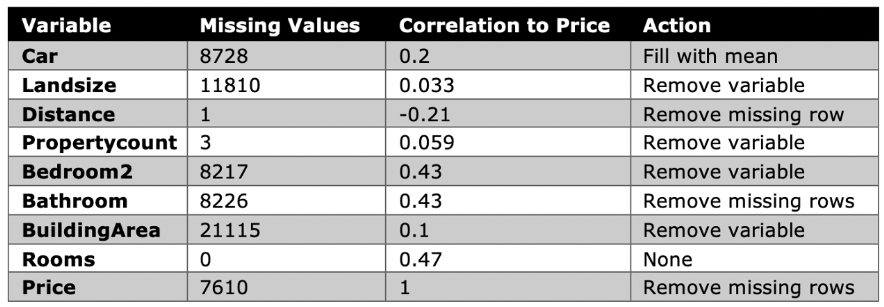

In [72]:
df.shape

(34857, 6)

In [73]:
#4. Remove or modify variables with missing values

#Remove variable BuildingArea
del df ['BuildingArea']

#Fill missing values with the mean for the variable Car
mean_car = df['Car'].mean()
df['Car'] = df['Car'].fillna(mean_car)

#Drop remaining missing values on a row-by-row basis
df.dropna(axis=0, how='any', subset=None, inplace=True)

In [74]:
df.shape

(20800, 5)

In [75]:
# Теперь у вас есть 20 800 строк, чуть больше половины исходного набора данных, 
# чего вполне достаточно для построения нашей линейной регрессионной модели.

## 5) Разбиение данных

In [76]:
#5. Set X and y variables

X = df[['Rooms', 'Distance', 'Bathroom', 'Car']]
y = df['Price']

#Let’s also shuffle and sub-divide the data into training and test sets using a standard 70/30 split. 
# To make the results replicable in the future,
#  you also need to control how the data is partitioned using a random seed number set to “10” for this exercise.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

## 6) Установим алгоритм

In [77]:
#6. Set algorithm
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## 7) Найдем y-интерцепт и коэффициенты X

In [78]:
# Используя следующий код, мы можем проверить y-интерцепт нашей модели и коэффициенты для каждой из четырех независимых переменных. 
# Обратите внимание, что вам нужно будет запустить эти две функции по отдельности (удалить одну функцию из модели, чтобы запустить другую) 
# или запустить их в отдельных ячейках, чтобы просмотреть каждый вывод.

In [79]:
#7. Find y-intercept and X coefficients

#Find y-intercept
print("model.intercept_ result:")
print(model.intercept_)
print()

# Find x coefficients
print("model.coef_ result:")
print(model.coef_)
print()

model_results = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print(model_results)

model.intercept_ result:
282725.3156777682

model.coef_ result:
[269450.10790036 -37787.76622417 207173.05927097  47417.17159475]

           Coefficients
Rooms     269450.107900
Distance  -37787.766224
Bathroom  207173.059271
Car        47417.171595


## 8) Прогнозирование

In [80]:
# Теперь запустим модель для определения стоимости отдельного объекта недвижимости, 
# создав новую переменную (new_house) с использованием следующих входных признаков:

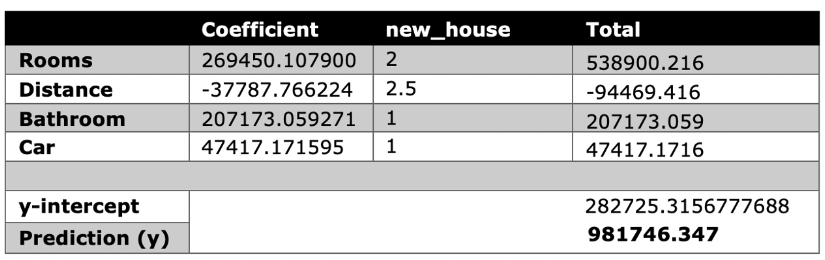

In [81]:
#8. Predict 

new_house = [
    2, #Rooms
    2.5, #Distance
    1, #Bathroom
    1, #Car
]

new_house_predict = model.predict([new_house])
print(new_house_predict)

[981746.34678378]


c:\Users\kuche\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 9) Оценка

In [82]:
# Используя среднюю абсолютную ошибку из Scikit-learn, мы можем сравнить разницу между ожидаемой ценой, 
# предсказанной моделью для тестового набора, и фактической ценой.

In [83]:
#9. Evaluate

prediction = model.predict(X_test)
print(metrics.mean_absolute_error(y_test, prediction))

363782.9423236326


In [84]:
# Такой относительно высокий уровень ошибок не является неожиданным, 
# поскольку мы удалили 16 переменных из исходного набора данных. 

# Например, переменная «Тип» (дом, блок или квартира) является основным показателем стоимости дома. 
# Однако, поскольку эта переменная имеет нечисловое выражение, мы не стали включать ее в нашу модель. 
# Однако Вы можете перестроить модель и преобразовать Type в числовые переменные с помощью одноточечного кодирования.

# Стоит отметить, что, хотя линейная регрессия работает очень быстро, она не отличается точностью предсказаний.

# 2.5 Регуляризация: LASSO, RIDGE, etc.

In [85]:
# Переобучение возникает тогда, когда модель имеет низкое смещение, но высокую дисперсию — 
# она слишком хорошо подстраивается под обучающие данные, но плохо справляется с новыми.

In [86]:
# Смещение (bias): Отражает, насколько сильно модель упрощает зависимость. 
# Высокое смещение характерно для моделей с низкой сложностью, которые не могут адекватно описать сложные зависимости в данных. 
#
# Смещение — это систематическая ошибка модели, которая возникает из-за её неспособности точно отразить сложные зависимости в данных. 
# Это приводит к тому, что предсказания модели регулярно отклоняются от истинных значений в одну сторону, 
# что связано с чрезмерным упрощением (или недообучением).

# Дисперсия (variance): Характеризует, насколько модель чувствительна к изменениям в обучающей выборке.
# Высокая дисперсия свойственна сложным моделям, которые могут слишком точно подогнать данные и переобучиться.

In [87]:
# Регуляризация — это важный метод борьбы с переобучением, который помогает уменьшить дисперсию модели, 
# не увеличивая её смещение слишком сильно. 

# Основная идея регуляризации заключается в том, чтобы контролировать сложность модели, 
# предотвращая её чрезмерную адаптацию к обучающей выборке. 
# Регуляризация вводит дополнительные ограничения на параметры модели, что помогает снизить вероятность переобучения.

# В математическом смысле регуляризация заключается в добавлении дополнительных членов в функцию потерь, 
# которые штрафуют модель за слишком большие значения параметров. 
# Это заставляет модель выбирать более "простые" решения, которые лучше обобщают данные.

# Большие веса делают модель слишком зависимой от отдельных признаков, усиливая их влияние на предсказания. 
# Это приводит к тому, что модель лучше запоминает обучающую выборку, включая её шум, вместо того, 
# чтобы находить общие закономерности, что и вызывает переобучение.

# Регуляризация штрафует за слишком большие веса!

# Регуляризация особенно полезна, когда модель имеет много параметров или когда доступно ограниченное количество данных. 
# В таких случаях регуляризация помогает снизить риск того, что модель начнёт подстраиваться под случайные шумы.

In [88]:
# Регуляризация позволяет модели избежать переобучения, улучшая её способность обобщать. 
# При этом важно не переусердствовать с регуляризацией, так как это может привести к противоположной проблеме — 
# недообучению (underfitting), когда модель слишком упрощена и не может должным образом описать зависимости в данных.

# Обобщающая способность описывает, насколько хорошо модель может предсказывать данные, которые она не видела во время обучения. 
# Если модель хорошо справляется с новыми данными, это говорит о том, 
# что она извлекла полезные закономерности из обучающей выборки и не просто запомнила конкретные наблюдения.

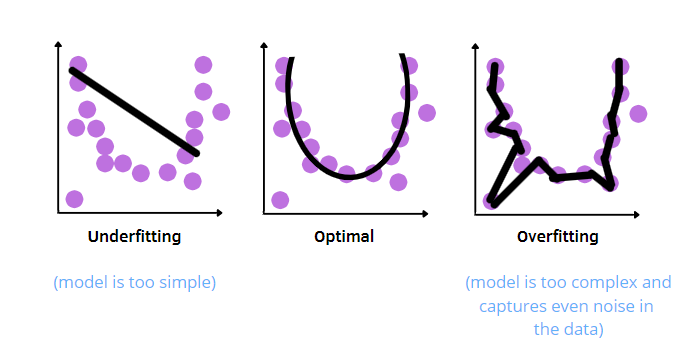

In [89]:
# Типы регуляризации в машинном обучении

In [90]:
# 1. Регуляризация L2 (Ridge)

# L2-регуляризация — это один из самых популярных методов регуляризации, 
# который также известен как гребневая регрессия (Ridge). 

# В L2-регуляризации к функции потерь модели добавляется штраф, пропорциональный сумме квадратов весов параметров модели. 
# Это позволяет ограничить значения параметров модели и предотвращает их чрезмерный рост.

# Основная идея L2-регуляризации заключается в том, что мы стремимся минимизировать не только ошибку модели, 
# но и величину её параметров. Это предотвращает чрезмерную подгонку модели под данные.

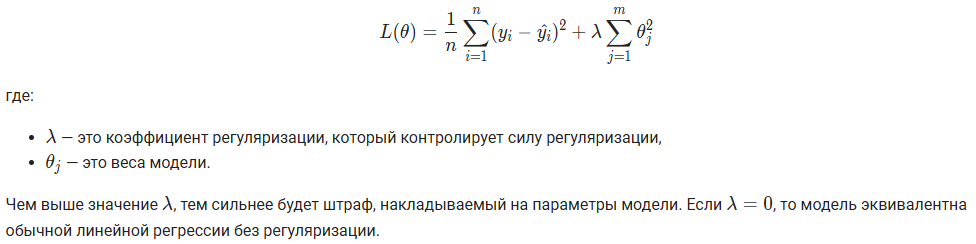

In [91]:
# Преимущества:
# L2-регуляризация хорошо работает, когда все признаки вносят вклад в предсказание, но требуется контролировать их вес.
# Способствует созданию модели, которая устойчива к шуму в данных.

# Недостатки:
# Веса параметров уменьшаются, но никогда не обнуляются, что может быть неэффективно для задач с избыточными признаками.

In [92]:
# 2. Регуляризация L1 (Lasso)

# L1-регуляризация или Lasso (Least Absolute Shrinkage and Selection Operator) также добавляет штраф к функции потерь, 
# но вместо квадратов параметров модель штрафуется за абсолютные значения весов. 
# Это приводит к тому, что некоторые параметры могут стать равными нулю, effectively excluding certain features.

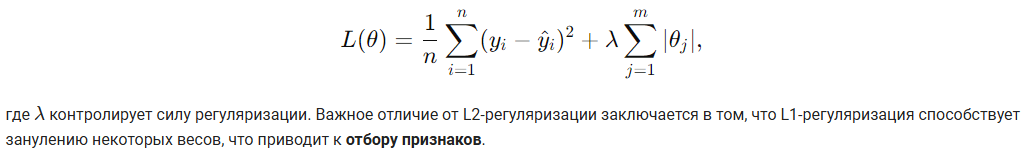

In [93]:
# Преимущества:
# L1-регуляризация эффективно справляется с задачами, где есть избыточные или неинформативные признаки, 
# так как она стремится занулять их вес.
# Позволяет сделать модель более интерпретируемой за счёт сокращения числа используемых признаков.

# Недостатки:
# L1-регуляризация может плохо работать в ситуациях, когда существует несколько признаков с похожими уровнями важности. 
# В таких случаях она может случайно занулять один из полезных признаков.

In [94]:
# 3. Elastic Net

# Elastic Net — это метод регуляризации, который комбинирует как L1, так и L2-регуляризацию. 
# Идея Elastic Net заключается в том, чтобы одновременно учитывать как штраф за абсолютные значения весов (L1), 
# так и за их квадраты (L2). 
# Это даёт более гибкую настройку модели, позволяя извлекать лучшее из обоих методов.

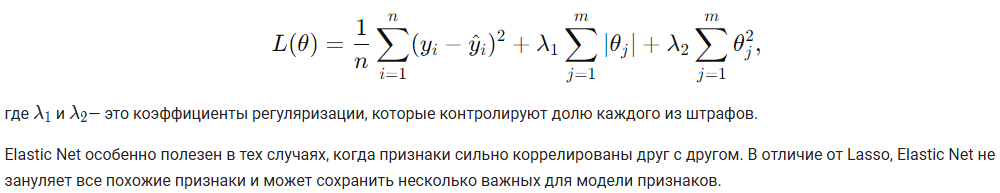

In [95]:
# Преимущества:
# Сочетает преимущества L1 и L2-регуляризаций.
# Работает лучше L1-регуляризации при наличии множества коррелированных признаков.

# Недостатки:
# Требуется подбор двух гиперпараметров (λ1 и λ2), что усложняет настройку модели.

# Реализация метода регуляризации Ridge

## 1) Импорт библиотек

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

## 2) Импорт набора данных

In [97]:
# Загрузка данных
data = pd.read_csv('data/Melbourne_housing_FULL.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## 3) Разведывательный анализ данных

In [98]:
# Быстрый обзор данных
print(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [99]:
# Проверка наличия пропущенных данных
print(data.isna().sum())

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


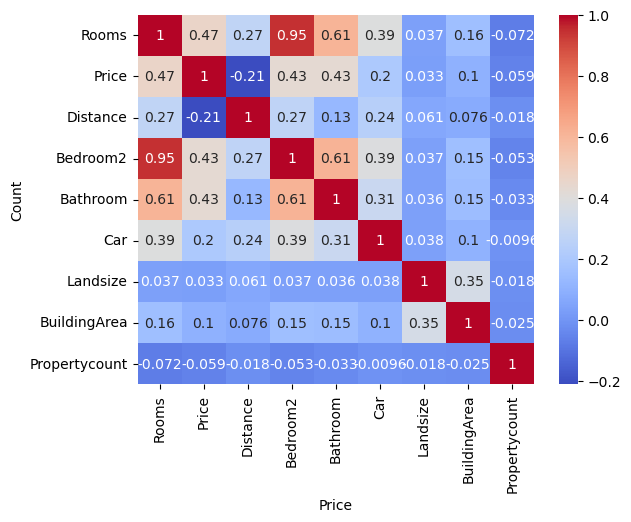

In [100]:
# Визуализация распределения целевой переменной
sns.histplot(data['Price'])
plt.show()

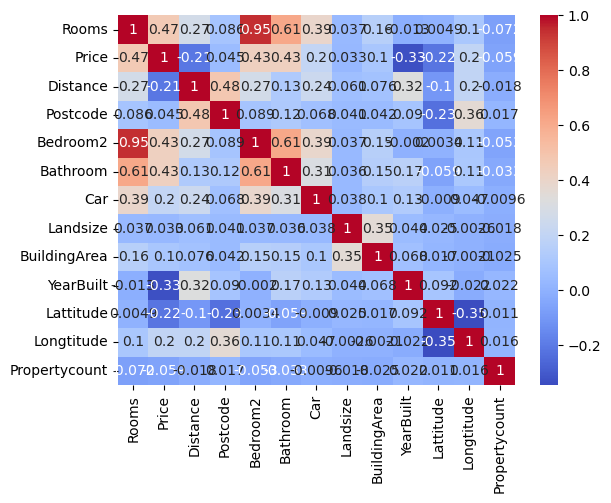

In [101]:
# Корреляционная матрица
corr_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show();

## 4) Очистка и обработка данных

In [102]:
# Удаление строк с пропущенными значениями
data_clean = data.dropna()

# Выбор нужных признаков для модели
features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Distance']
X = data_clean[features]
y = data_clean['Price']

# Преобразование категориальных переменных в числовые при необходимости
X = pd.get_dummies(X, drop_first=True)

## 5) Разбиение данных

In [103]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6) Обучение алгоритма (получение модели)

In [104]:
# Создание и обучение модели Ridge-регрессии
ridge_model = Ridge(alpha=1.0)  # Коэффициент регуляризации alpha можно изменять
ridge_model.fit(X_train_scaled, y_train)

Ridge()

## 7) Прогнозирование

In [105]:
# Прогнозирование на тестовой выборке
y_pred = ridge_model.predict(X_test_scaled)

## 8) Оценка качества предсказания

In [106]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

MSE: 177833788008.75235
MAE: 296309.9371352339
R^2: 0.5502475373400368


## 9) Оптимизация

In [107]:
# Поиск лучшего параметра alpha через GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Лучшая модель и параметр
print(f'Лучший параметр alpha: {grid_search.best_params_}')
best_ridge_model = grid_search.best_estimator_

# Прогнозирование и оценка с лучшей моделью
y_pred_best = best_ridge_model.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print(f'Лучший MSE: {mse_best}')
print(f'Лучший MAE: {mae_best}')
print(f'Лучший R^2: {r2_best}')
# Лучший параметр alpha: {'alpha': 100.0}
# Лучший MSE: 177770014041.41397
# Лучший MAE: 295956.9822215604
# Лучший R^2: 0.5504088255810691

Лучший параметр alpha: {'alpha': 100.0}
Лучший MSE: 177770014041.4139
Лучший MAE: 295956.9822215604
Лучший R^2: 0.5504088255810692


# 2.6 kNN

In [108]:
# Классификация новой точки данных на основе ближайших точек (ближайших соседей)

In [109]:
# Пример для k=3 и k=7
# Для k=3 новая точка будет отнесена к классу B (мода для соседей -- класс B)

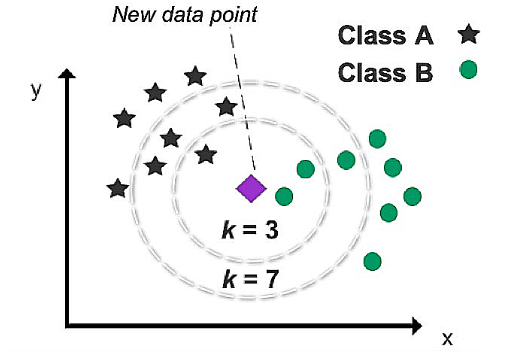

In [110]:
# Для того, чтобы найти ближайшие k точек, надо посчитать расстояние от нашей точки для всех остальных.

# Основные метрики расстояния
# В задачах машинного обучения, особенно в методах, связанных с кластеризацией и классификацией 
# (например, K-ближайших соседей), важно измерять расстояние между точками в пространстве признаков. 
# В зависимости от природы данных и задачи можно использовать различные метрики расстояния.

In [111]:
# 1. Евклидово расстояние

# Евклидово расстояние — это наиболее интуитивная и распространённая метрика, 
# которая измеряет "прямое" расстояние между двумя точками в пространстве.

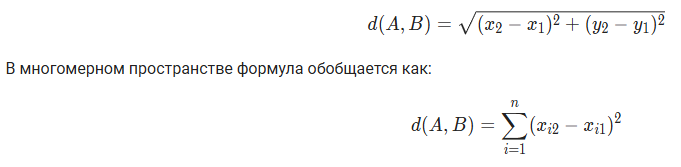

In [112]:
# Преимущества:
# Легко интерпретировать.
# Подходит для большинства задач, когда признаки находятся в одном масштабе.

# Недостатки:
# Чувствительна к разным масштабам признаков и выбросам.

In [113]:
# 2. Манхэттенское расстояние

# Манхэттенское расстояние измеряет расстояние вдоль осей признаков, 
# как если бы мы двигались по прямым линиям вдоль улиц, как в городе с прямоугольной сеткой дорог.

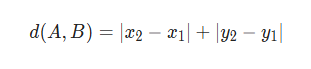

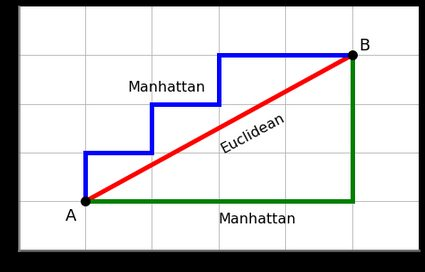

In [114]:
# Преимущества:
# Удобно для данных с разной важностью отдельных признаков.
# Менее чувствительна к выбросам по сравнению с Евклидовым расстоянием.

# Недостатки:
# Может не подходить для задач, где важны "напрямую" измеренные расстояния.

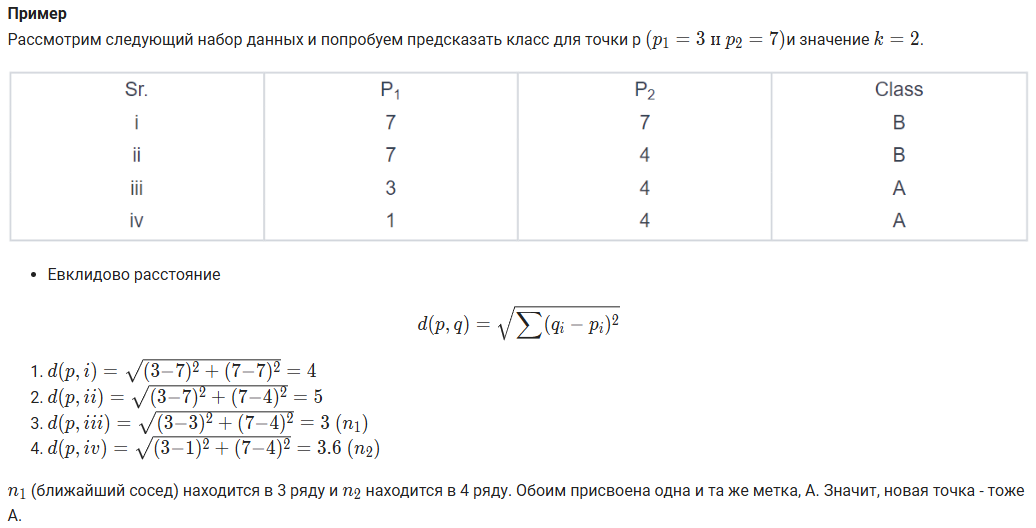

In [115]:
# Метод k-nearest neighbor иногда называют «процедурой, основанной на памяти», 
# поскольку при каждом прогнозировании используются все обучающие данные. 

# По этой причине k-NN обычно не рекомендуется использовать для анализа больших наборов данных 
# и измерения множества расстояний в высокоразмерных данных. 

# Однако сокращение числа измерений с помощью алгоритма понижения размерности, 
# такого как анализ главных компонент (PCA), 
# или объединение переменных - это распространенная стратегия упрощения и подготовки k-NN-анализа.

# Реализация метода регуляризации kNN

In [116]:
# Реализация k-NN включает в себя следующие шаги:

# Импорт библиотек
# Импорт набора данных
# Удаление переменных
# Масштабирование данных
# Установка значений X и y
# Применение алгоритма
# Оценка предсказания
# Оптимизация
# Прогнозирование

## 1) Импорт библиотек

In [117]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 2) Импорт набора данных

In [118]:
#2- Import dataset
df = pd.read_csv('data/advertising.csv')
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## 3) Разведывательный анализ данных

In [119]:
# Удалим дискретные переменные из кадра данных, 
# включая Ad Topic Line, Timestamp, Male, Country и City. 

# k-NN обычно лучше работает с непрерывными переменными, такими как возраст и доход в регионе.

In [120]:
#3- Remove variables
del df ['Ad Topic Line']
del df ['Timestamp']
del df['Male']
del df ['Country']
del df ['City']

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,0
4,68.37,35,73889.99,225.58,0


## 4) Масштабирование данных

In [121]:
# Учитывая, что масштаб переменных оказывает большое влияние на результаты работы этого алгоритма, 
# воспользуемся функцией StandardScaler() из Scikit-learn, 
# чтобы стандартизировать дисперсию независимых переменных (отбросив при этом зависимую переменную Clicked on Ad). 

# Это преобразование поможет избежать переменных с большим диапазоном, несправедливо перетягивающих на себя внимание модели.

# StandardScaler преобразует данные так, чтобы они имели среднее значение 0 и стандартное отклонение 1. 
# Он вычитает среднее каждого признака и делит на его стандартное отклонение, нормализуя данные для улучшения работы моделей. 
# Это нужно для того, чтобы все признаки имели одинаковый масштаб.

In [122]:
#4- Scale data
scaler = StandardScaler()
scaler.fit(df.drop('Clicked on Ad',axis=1))
scaled_features = scaler.transform(df.drop('Clicked on Ad',axis=1))

## 5) Разбиение данных

In [123]:
#5- Set X and y values
X = scaled_features
y = df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, shuffle=True)

## 6) Обучение алгоритма (получение модели)

In [124]:
# Установка k равного нечетному число помогает устранить возможность возникновения тупиковой ситуации 
# (половина соседей -- желтые, половина -- синие).

In [125]:
#6- Set algorithm
model = KNeighborsClassifier(n_neighbors=5)

#Fit the algorithm to the training data.
model.fit(X_train, y_train)

KNeighborsClassifier()

## 7) Оценка

In [126]:
#7- Evaluate
model_predict = model.predict(X_test)

print(confusion_matrix(y_test, model_predict))
print(classification_report(y_test, model_predict))

[[144   2]
 [ 10 144]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       146
           1       0.99      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [127]:
# Модель дает хорошие результаты с низким числом ложноположительных (2) и ложноотрицательных (10) результатов и коэффициентом f1, равным 0,96.

## 8) Оптимизация

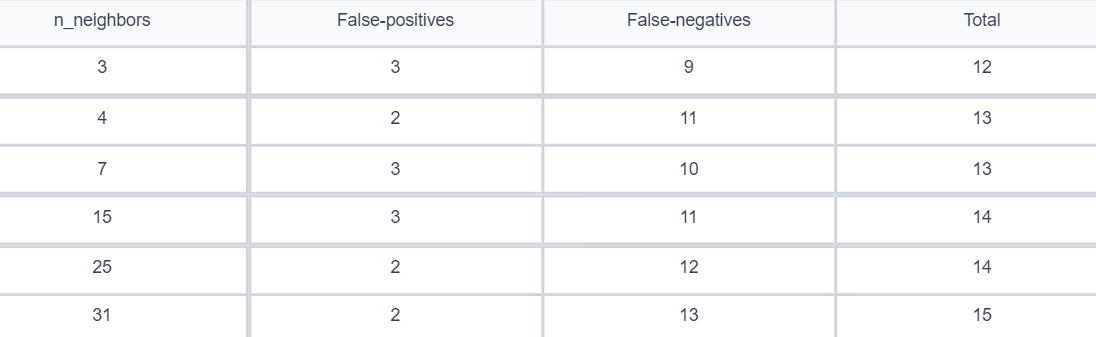

In [128]:
# Теперь вы можете поэкспериментировать с количеством соседей, выбранным на шаге 5, и уменьшить количество неверно предсказанных исходов.

# Результаты при различных комбинациях n_neighbors
# n_соседей

## 9) Прогнозирование

In [129]:
# В качестве последнего шага этого упражнения вы можете развернуть нашу модель (n_neighbors=3) 
# на первых 10 строках кадра данных scaled_features, чтобы предсказать вероятный результат.

In [130]:
#9- Predict
model.predict(scaled_features)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [131]:
# Согласно нашей модели прогнозирования и на основе трех ближайших соседей, 
# ожидается, что только один пользователь нажмет на рекламу (1). 
# Как и следовало ожидать, предсказания модели точны, если сравнить результаты с данными, использованными для обучения.

In [132]:
# В то же время следует заметить, что kNN это достаточно маломощный алгоритм и у него есть очевидные минусы:

# 1) Высокая вычислительная сложность: 
# Алгоритм требует расчета расстояний до всех точек данных при каждом предсказании, что замедляет его работу на больших выборках.
# 2) Чувствительность к масштабу данных: 
# Если признаки имеют разные масштабы, это может исказить результаты, так как метрики расстояния (например, Евклидово расстояние) 
# будут более чувствительны к признакам с большими значениями. Для этого мы применяли стандартизацию признаков через StandartScaler.
# 3) Требует большого объёма памяти: 
# Для работы алгоритму необходимо хранить все данные обучающей выборки, что может стать проблемой для больших наборов данных.
# 4) Чувствительность к выбросам: 
# Алгоритм может ошибочно интерпретировать выбросы как ближайших соседей, что приводит к ухудшению качества предсказаний.
# 5) Отсутствие интерпретации: В отличие от других моделей, таких как линейная регрессия или деревья решений, kNN не даёт явной интерпретации важности признаков или структуры зависимости в данных.

# То есть алгоритм во-первых не слишком мощный, а во-вторых, не очень интерпретируемый. Печально! Однако, на практике, даже у него есть некоторые применения в индустрии.

# 2.7 Линейная классификация

In [133]:
# Бинарная классификация

# Идея линейной классификации заключается в том, что мы можем найти разделяющую линию (в случае двух признаков) 
# или гиперплоскость (в многомерном случае), которая разделит объекты на два класса. 

# Для двумерного случая (рост и вес) уравнение разделяющей прямой может быть записано как:
# a⋅Вес+b⋅Рост+c=0

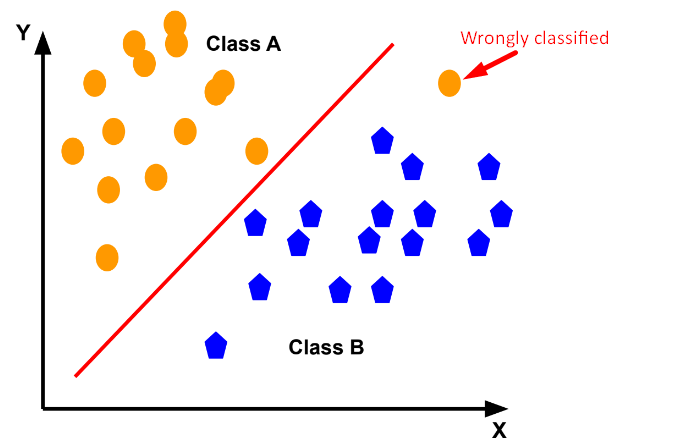

In [134]:
# где a,b и c — это параметры нашей модели. 
# Эта прямая разделяет пространство на две части: 
# точки над прямой удовлетворяют неравенству a⋅Вес+b⋅Рост+c>0 и принадлежат одному классу, 
# а точки под прямой — другому классу, так как для них a⋅Вес+b⋅Рост+c<0.

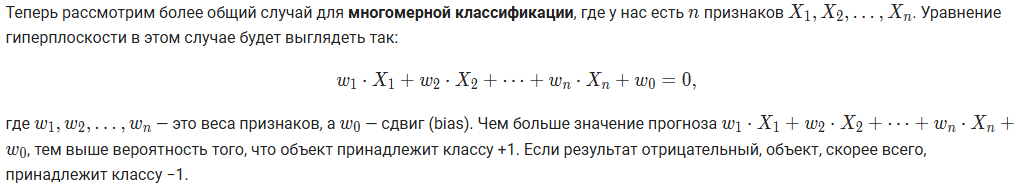

In [135]:
# Линейные модели, такие как персептрон или SVM с линейным ядром, не предоставляют способа предсказать вероятность принадлежности объекта к классу. 
# Эти модели просто определяют, к какому классу объект принадлежит, без указания вероятности.

In [136]:
# Логистическая регрессия

# В логистической регрессии результат линейной модели пропускается через специальную нелинейную функцию — сигмоиду (логистическую функцию), 
# которая преобразует линейный результат в вероятность, принимающую значения от 0 до 1.

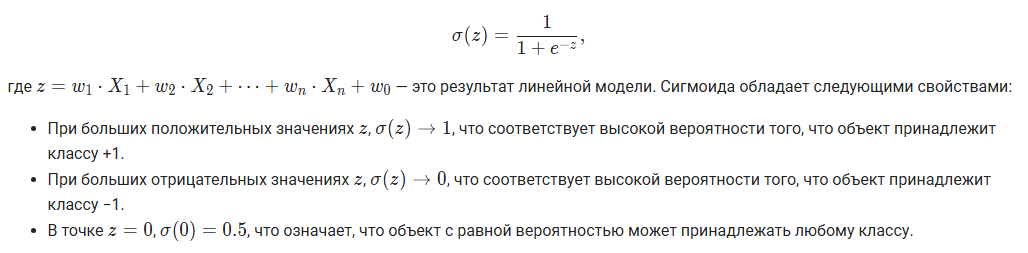

In [137]:
# Это свойство очень логично: 
# если объект находится прямо на разделяющей гиперплоскости, его принадлежность к одному из классов равна 50%. 
# Чем дальше объект от гиперплоскости в одну сторону, тем выше вероятность, что он принадлежит к классу +1, и наоборот.

In [138]:
# Чтобы найти параметры w1, w2, ..., wn, которые позволят провести гиперплоскость, 
# максимально точно разделяющую классы, как и в других моделях машинного обучения, используется функция потерь, 
# которая показывает, насколько хорошо модель справляется с классификацией.

# Для логистической регрессии используется логистическая функция потерь, 
# которая штрафует модель за ошибочные предсказания, особенно если они имеют высокую уверенность.

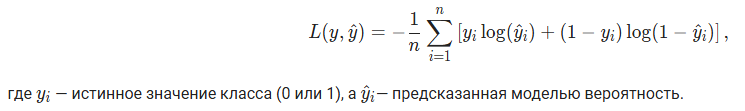

In [139]:
# Регуляризация

# Чтобы предотвратить переобучение и улучшить обобщающую способность модели, в логистической регрессии часто добавляют регуляризацию. 
# Регуляризация — это штраф за слишком большие значения весов модели, который позволяет сделать её менее чувствительной к шуму в данных. 
# Это добавляется в функцию потерь как дополнительный член.

In [140]:
# Градиентный спуск

# Для минимизации функции потерь в логистической регрессии используется метод градиентного спуска. 
# Этот метод позволяет постепенно корректировать параметры модели, снижая значение функции потерь на каждом шаге. 
# Градиентный спуск работает, вычисляя производные функции потерь по каждому параметру модели 
# и корректируя эти параметры в направлении, противоположном градиенту.

# Итак, минимизируя функцию потерь с регуляризацией с помощью градиентного спуска, находим разделяющую гиперплоскость, 
# которая максимально эффективно разделяет два класса, а также предсказывает вероятность принадлежности объекта к каждому классу.

In [141]:
# AUC-ROC

# Для оценки качества бинарных классификационных моделей, таких как логистическая регрессия, 
# часто используется метрика AUC-ROC. 

# ROC-кривая (Receiver Operating Characteristic) — это график, который отображает зависимость 
# между долей верно предсказанных положительных объектов (True Positive Rate, TPR) и долей ложных срабатываний (False Positive Rate, FPR) 
# при разных порогах вероятности.
 
# AUC (Area Under Curve) — это площадь под этой кривой, которая характеризует качество модели. 
# Чем ближе AUC к 1, тем лучше модель. AUC=0.5 означает, что модель классифицирует случайным образом.

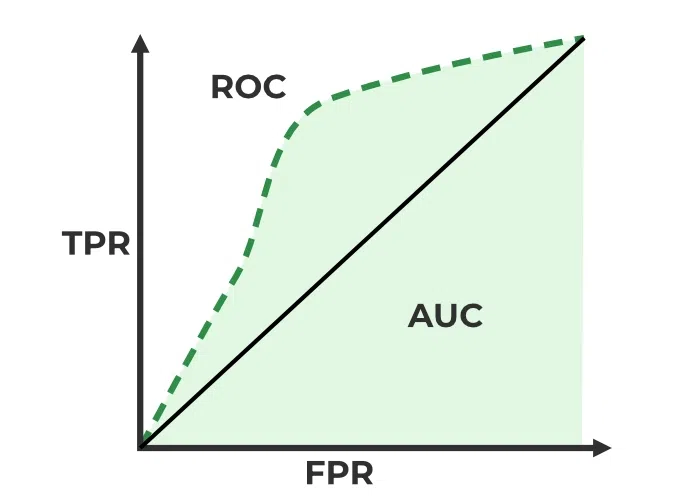

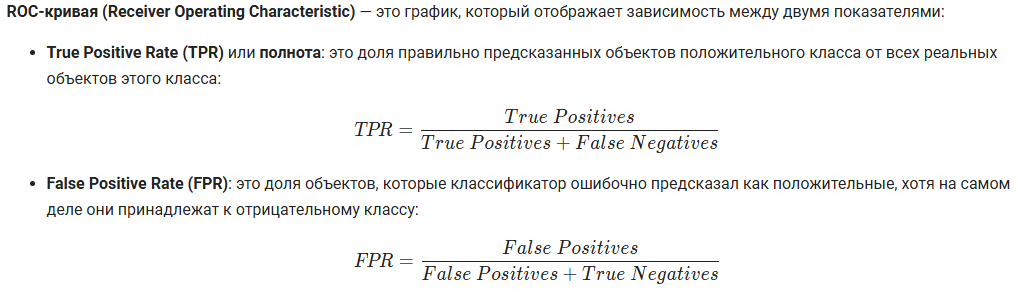

In [142]:
# Порог (threshold) в задачах классификации — это значение, которое используется для принятия решения о том, 
# к какому классу отнести объект на основе вероятности, предсказанной моделью. 

# Многие классификаторы (например, логистическая регрессия) предсказывают вероятность принадлежности объекта к классу +1, 
# и чтобы принять решение о финальной классификации, необходимо выбрать порог.

# Когда модель предсказывает вероятность, она возвращает число в диапазоне от 0 до 1.
# Чтобы на основе этой вероятности отнести объект к классу +1 или −1, мы используем пороговое значение.

# Если вероятность выше порога: Объект классифицируется как принадлежащий к классу +1 (положительный класс).
# Если вероятность ниже порога: Объект классифицируется как принадлежащий к классу −1 (отрицательный класс).

In [143]:
# Пример:

# Допустим, модель предсказывает вероятность 0.8 для объекта. 
# Если порог установлен на 0.5 (по умолчанию в большинстве алгоритмов), 
# то объект классифицируется как принадлежащий к положительному классу +1, так как 0.8>0.5.

# Но если мы изменим порог на 0.9, то тот же объект будет классифицирован как −1, так как 0.8<0.9.

In [144]:
# Важность выбора порога
# Выбор порога напрямую влияет на метрики классификации, 
# такие как точность (precision), полнота (recall), и FPR (False Positive Rate).

# Низкий порог приводит к тому, что больше объектов классифицируются как положительные 
# (меньше вероятность упустить положительные примеры, но можно допустить больше ложных срабатываний).

# Высокий порог приводит к тому, что только объекты с очень высокой вероятностью будут классифицированы как положительные, 
# что уменьшит количество ложных срабатываний, но может привести к пропуску некоторых положительных объектов.

In [145]:
# ROC-кривая и порог
# ROC-кривая строится для разных порогов классификации, чтобы показать, 
# как изменяются показатели TPR (True Positive Rate, или полнота) и FPR (False Positive Rate, или доля ложных срабатываний). 

# Изменяя порог, можно видеть компромисс между этими показателями:

# При низком пороге будет больше верных положительных предсказаний, но и больше ложных срабатываний.
# При высоком пороге ложных срабатываний станет меньше, но модель будет пропускать положительные объекты.

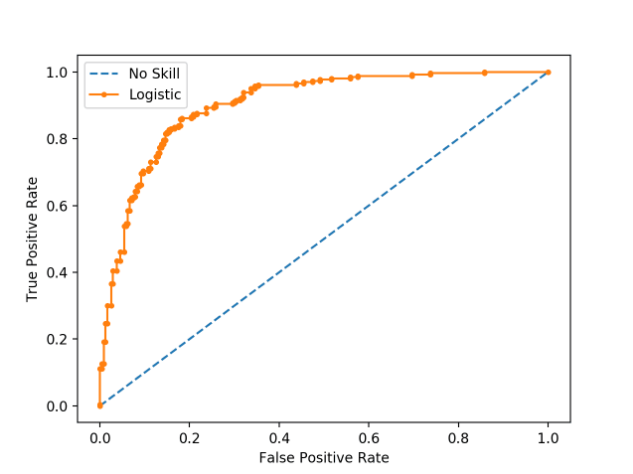

In [146]:
# Мультиклассовая классификация: подход one-vs-rest

# Многие задачи машинного обучения требуют классификации объектов не на два класса, а на несколько. 
# Основной подход, который позволяет адаптировать бинарные алгоритмы классификации 
# (например, SVM, логистическую регрессию) к многоклассовым задачам — это метод one-vs-rest (один против всех). 

# Его идея заключается в том, чтобы строить отдельную бинарную модель для каждого класса, 
# которая будет классифицировать объекты как принадлежащие этому классу или всем остальным.

In [147]:
# Представим, что у нас есть три класса: A, B, и C

# Для того чтобы классифицировать объекты с использованием one-vs-rest, мы создаём три бинарных классификатора:

# Классификатор A против всех: Этот классификатор пытается отделить объекты класса A от объектов классов B и C.
# Классификатор B против всех: Этот классификатор пытается отделить объекты класса B от объектов классов A и C.
# Классификатор C против всех: Этот классификатор отделяет объекты класса C от объектов классов A и B.

# Когда мы получаем новый объект для классификации, каждый из этих классификаторов предсказывает вероятность того, что объект принадлежит его классу. 
# Модель, которая окажется наиболее уверенной в своём предсказании, присваивает объект соответствующему классу.

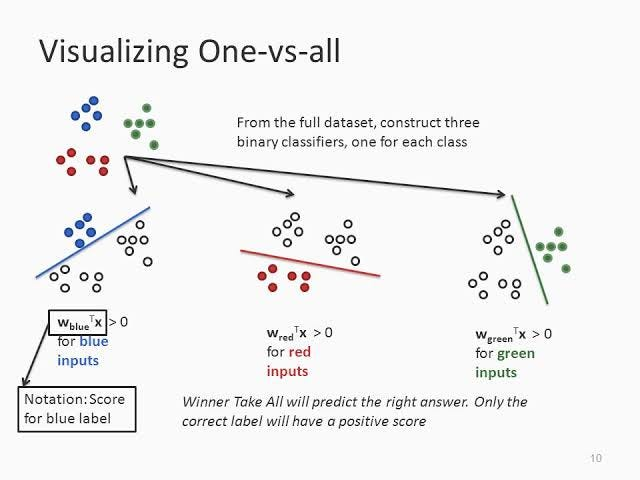

In [148]:
# Плюсы и минусы подхода one-vs-rest

# Плюсы:
# Простота и интуитивность: Легко понять и реализовать. Каждый классификатор фокусируется на конкретной задаче — разделить один класс от остальных.
# Гибкость: Этот подход можно использовать практически с любым бинарным классификатором (SVM, логистическая регрессия, деревья решений и т.д.).
# Масштабируемость: Подход one-vs-rest масштабируется на любое количество классов, позволяя решать задачи с десятками или сотнями классов.

# Минусы:
# Потенциальные конфликты: В реальных задачах может возникнуть ситуация, когда несколько классификаторов одновременно предсказывают, 
# что объект принадлежит их классу. Это может потребовать дополнительной обработки (например, выбора модели с наибольшей уверенностью).
# Независимость моделей: Каждая модель обучается независимо от других, что может привести к ситуации, когда разные модели принимают разные решения по одному и тому же объекту.
# Сложность вычислений: Для nnn классов нужно построить nnn независимых моделей, что увеличивает вычислительные затраты, особенно на больших данных.

In [149]:
# Линейные модели (например, линейная логистическая регрессия или SVM с линейным ядром) обладают как сильными, 
# так и слабыми сторонами. 
# 
# Ключевые плюсы и минусы.

# Плюсы линейных моделей:
# Простота и интерпретируемость: Линейные модели легко интерпретировать. 
# Каждый вес в модели указывает на важность соответствующего признака, 
# а разделяющая гиперплоскость имеет понятную геометрическую интерпретацию.
# Эффективность на разреженных данных: Линейные модели хорошо работают с данными, где многие признаки имеют нулевые значения (например, в текстовых данных).
# Скорость обучения: Линейные модели часто обучаются быстрее, чем нелинейные алгоритмы, особенно на больших наборах данных.
# Гарантия сходимости: Линейные модели имеют хорошо изученные теоретические свойства и гарантируют сходимость при обучении.

# Минусы линейных моделей:
# Ограничение по сложности данных: Линейные модели хорошо работают только тогда, когда классы можно разделить с помощью гиперплоскости. 
# В случае сложных нелинейных зависимостей они неэффективны.
# Чувствительность к выбросам: Линейные модели могут быть сильно искажены выбросами, 
# так как гиперплоскость пытается оптимизироваться для всех точек, включая аномальные данные.
# Масштабирование признаков: Линейные модели требуют предварительной обработки данных, особенно нормализации признаков. 
# Если данные не масштабировать, модели могут давать некорректные результаты, так как признаки с большим масштабом будут доминировать в решении.

# 2.8 Логистическая регрессия

# Реализация логистической регрессии

In [150]:
# Реализация логистической регрессии включает в себя следующие шаги:

# Импорт библиотек
# Импорт набора данных
# Удаление переменных
# Преобразование нечисловых значений
# Удаление и заполнение недостающих значений
# Установка переменных X и y
# Установка алгоритм
# Прогнозирование
# Оценка